# Исследование рынка видеоигр

В рамках данного проекта стоит задача изучить исторические данные о рынке видеоигр и определить закономерности в успешности определенных игр, которые позволят определять потенциал продукта и экономический результат. Для достижения цели проекта были выполнены следующие задачи:

1. Изучены вводные данные
2. Предобработка данных
3. Исследовательский анализ данных
4. Портрет пользователя
5. Проверка гипотез
6. Общий вывод

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from functools import reduce
from scipy import stats as st

## 1. Вводные данные

In [2]:
games = pd.read_csv('/datasets/games.csv')
games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Исходный датасет состоит из 16715 строк и 11 столбцов. Среди значений есть пропуски в столбцах Name, Year_of_Release, Critic_Score, User_Score, Rating. Необходимо установить природу этих пропусков и обработать их. На первый взгляд, природа пропуском в столбах с оценками от критиков и пользователей объясняется непопулярностью игр, недостаточным количеством отзывов для формирования релевантного рейтинга. В столбцах Name и Year_of_release также есть пропуски, количество которых небольшое. Вероятно, эти пропуски связаны с ошибками при выгрузке базы данных.
Тип значений также требует обработки в столбцах Year_of_Release и Critic_Score

## 2. Предобработка данных

### 2.1 Заменить названия столбцов

Приведем название столбцов к нижнему регистру

In [4]:
games.columns = games.columns.str.lower()
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### 2.2 Преобразовать данные в нужные типы

Преобразуем данные в некоторых столбцах:
1. year_of_release - заменим тип данных с float на int, что соответствуют значению года;
2. user_score - заменим тип данных с object на float, для дальнейшей работы с рейтингом от пользователей как числовым значением

In [5]:
games[games['year_of_release'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Как мы видим, в столбце year_of_release есть 269 значений NaN. Это значение составляет 1.6% от исходной таблицы, при этом заполнить такие пропуски определенным значением не получится ввиду отсутствия взаимосвязи с другими столбцами. Удалим эти значения и заменим тип данных на int

In [6]:
games.dropna(subset=['year_of_release'], inplace=True)
games = games.reset_index(drop=True)
games['year_of_release'] = games['year_of_release'].astype('int')
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16441,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16442,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16443,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16444,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [7]:
games[games['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
300,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
516,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
639,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
710,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16426,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16428,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16429,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16435,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


В столбце user_score есть 2376 значений 'tbd'. Согласно распространенному определению, tbd является аббревиатурой 'to be decided', т.е. значение еще не определено на данный момент. Эти строки стоит оставить, так как они содержат важную информацию о продажах игр для разных платформ. При дальнейшем применении метода to_numeric с атрибутом errors='coerce', эти значения сменятся на NaN

In [8]:
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16446 entries, 0 to 16445
Data columns (total 11 columns):
name               16444 non-null object
platform           16446 non-null object
year_of_release    16446 non-null int64
genre              16444 non-null object
na_sales           16446 non-null float64
eu_sales           16446 non-null float64
jp_sales           16446 non-null float64
other_sales        16446 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### 2.3 Обработать пропуски

Как мы можем заметить, в столбцах critic_score, user_score и rating есть большое количество значений NaN. Их происхождение, вероятно, связано с отсутствием отзывов от критиков и пользователей ввиду невысокой популярности данных игр. В силу большого количества игр на рынке, не все они могут быть оценены (при этом объективно). Подобные значения можно заменить на среднее по жанру или платформе, но, на мой взгляд, лучше оставить в значении NaN. В таком случае, при работе с имеющимися данными, мы сможем объективно оценить рынок, предпочтения критиков и пользователей. 

### 2.4 Посчитать суммарные продажи по регионам

Посчитаем суммарные продажи по регионам: NA, EU, JP и OTHER

In [9]:
games['sale_total'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games['na_total'] = games['na_sales'].sum()
games['eu_total'] = games['eu_sales'].sum()
games['jp_total'] = games['jp_sales'].sum()
games['other__total'] = games['other_sales'].sum()
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sale_total,na_total,eu_total,jp_total,other__total
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,4343.2,2400.21,1290.67,782.71
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24,4343.2,2400.21,1290.67,782.71
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,4343.2,2400.21,1290.67,782.71
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,4343.2,2400.21,1290.67,782.71
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38,4343.2,2400.21,1290.67,782.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16441,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,4343.2,2400.21,1290.67,782.71
16442,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01,4343.2,2400.21,1290.67,782.71
16443,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,4343.2,2400.21,1290.67,782.71
16444,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01,4343.2,2400.21,1290.67,782.71


В результате подготовки данных:
1. Названия столбцов были приведены к нижнему регистру
2. Данные в столбце year_of_release очищены и заменены на тип int64
3. Значения в столбце user_score переведены в формат float64 (значения tbd переведены в NaN)
4. Обоснована логика по работе со значениями NaN
5. Посчитаны суммарные продажи по регионам na, eu, jp и other

## 3. Исследовательский анализ данных

На этом этапе последовательно выполним следующие задачи:
1. Рассмотрим динамику количества новых игр по годам;
2. Рассмотрим распределение продаж по платформам;
3. На основе полученных результатов, установим актуальный период;
4. Проанализируем этот период;
5. Рассмотрим выбросы продаж по платформам с помощью "ящика с усами";
6. Рассмтрим влияние на продажи отзывов критиков и пользователей, установим корреляцию;
7. Рассмотрим распределение игр по жанрам и попробуем выявить взаимосвязь с продажами.

### 3.1 Рассмотрим динамику количества новых игр по годам

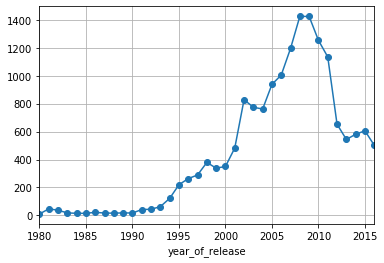

In [10]:
games_by_year = games.groupby('year_of_release')['year_of_release'].count()
games_by_year.plot(style='o-', grid=True)

In [11]:
games_by_year.describe()

count      37.000000
mean      444.486486
std       451.557159
min         9.000000
25%        36.000000
50%       338.000000
75%       762.000000
max      1427.000000
Name: year_of_release, dtype: float64

Результаты показывают, что пик количества новых игр приходится на 2008 и 2009 год. В среднем, каждый год выпускается 444 игры, но в 2008 и 2009 было выпущено более 1400 игр

### 3.2 Рассмотрим распределение продаж по платформам

Определим топ продаж по платформам и построим распределение по годам

In [12]:
games_platform = games.groupby('platform')['sale_total'].sum().sort_values(ascending=False)
games_platform

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: sale_total, dtype: float64

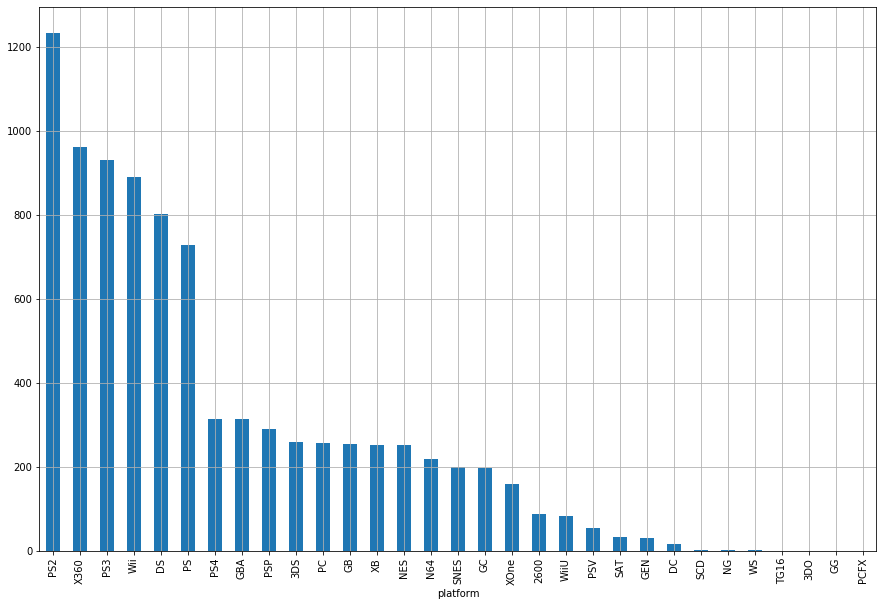

In [13]:
games_platform.plot(kind='bar', grid=True, figsize=(15, 10))

---
## Комментарий от наставника

Лучше построить график. Результат будет нагляднее. 

---

In [14]:
top_platforms = {'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP',
                 '3DS', 'PC', 'GB', 'XB', 'NES', 'N64', 'SNES', 'GC', 'XOne'}
games_top_platforms = games.query('platform in @top_platforms').reset_index(drop=True)
games_top_platforms.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sale_total,na_total,eu_total,jp_total,other__total
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,4343.2,2400.21,1290.67,782.71
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24,4343.2,2400.21,1290.67,782.71
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,4343.2,2400.21,1290.67,782.71
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,4343.2,2400.21,1290.67,782.71
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38,4343.2,2400.21,1290.67,782.71


In [15]:
games_top_platform_grouped = games_top_platforms.pivot_table(
    index=['year_of_release', 'platform'], values='sale_total', aggfunc='sum').reset_index(inplace=False)
games_top_platform_grouped

,year_of_release,platform,sale_total
0,1983,NES,10.96
1,1984,NES,50.08
2,1985,DS,0.02
3,1985,NES,53.44
4,1985,PC,0.04
...,...,...,...
180,2016,PS3,3.60
181,2016,PS4,69.25
182,2016,Wii,0.18
183,2016,X360,1.52


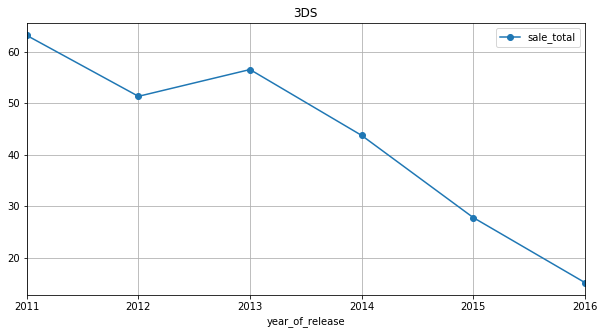

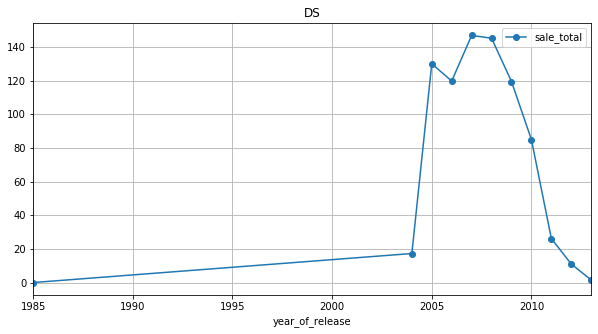

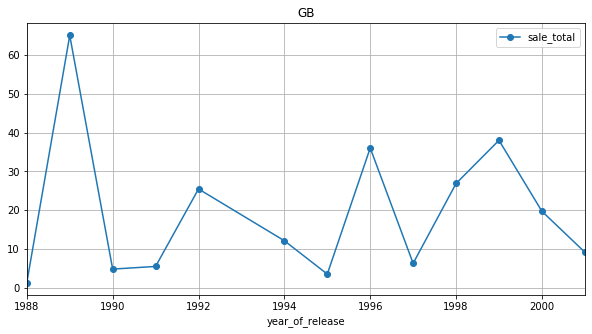

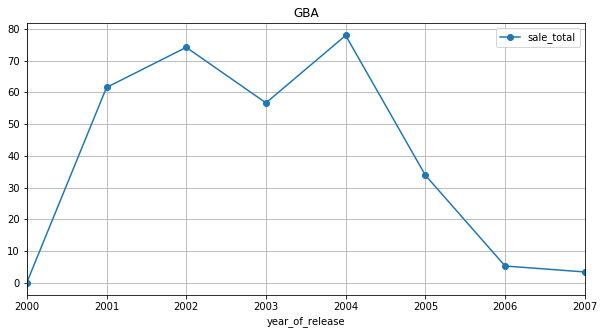

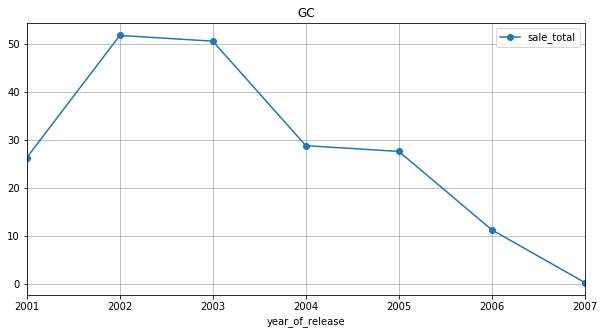

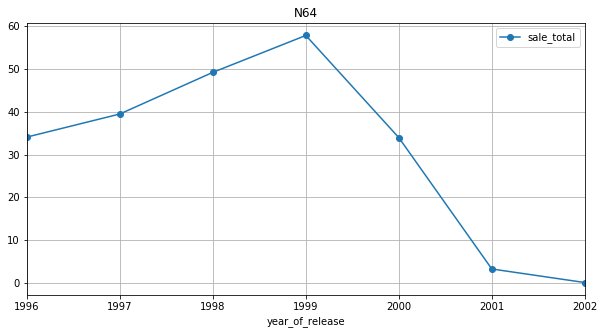

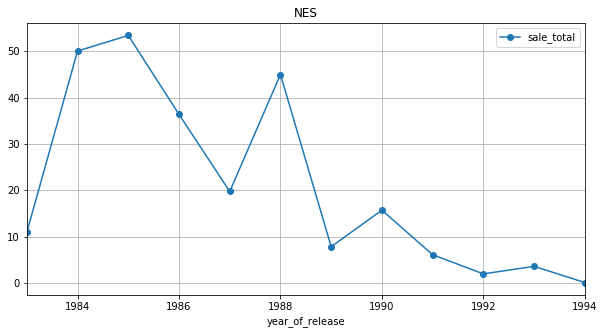

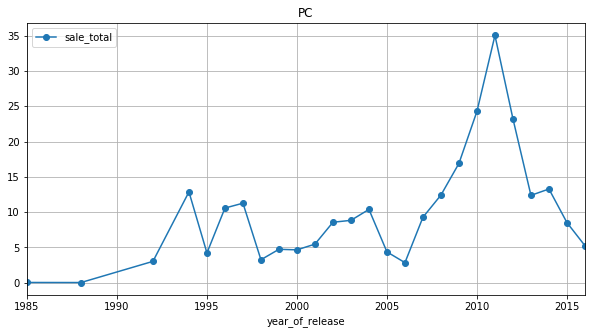

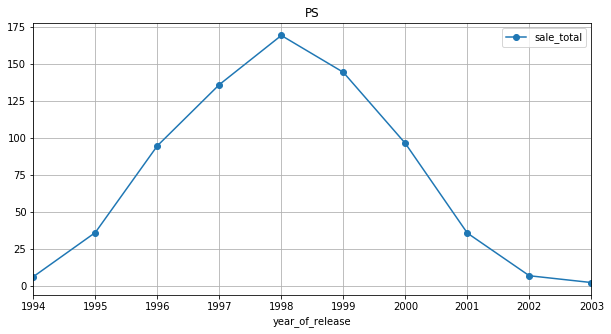

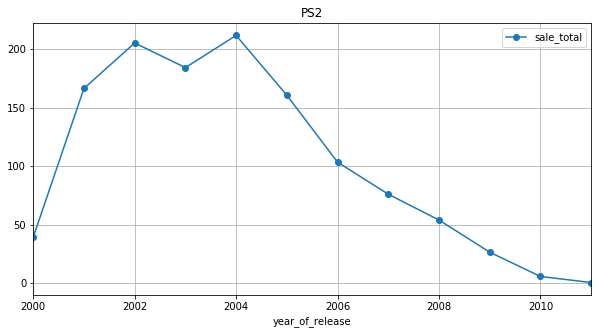

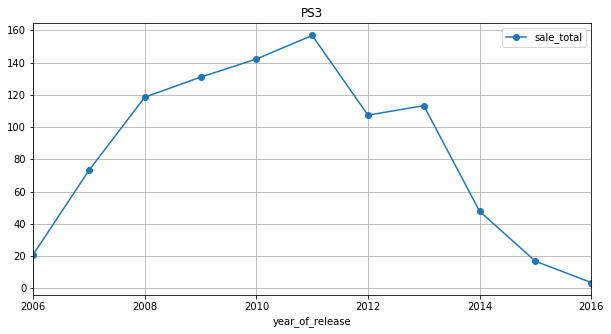

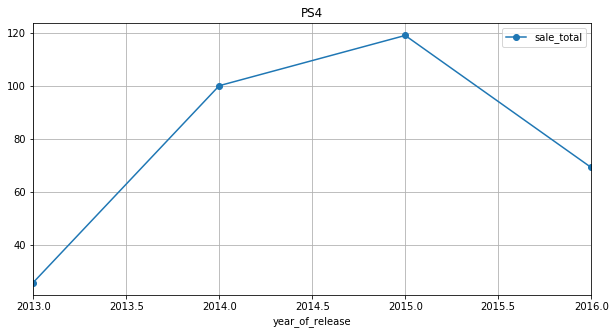

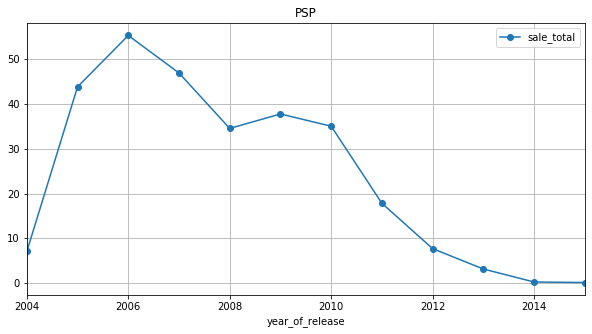

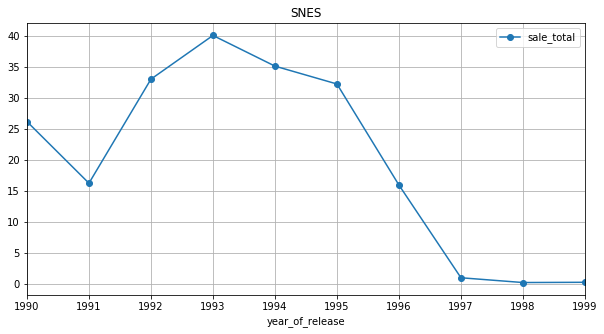

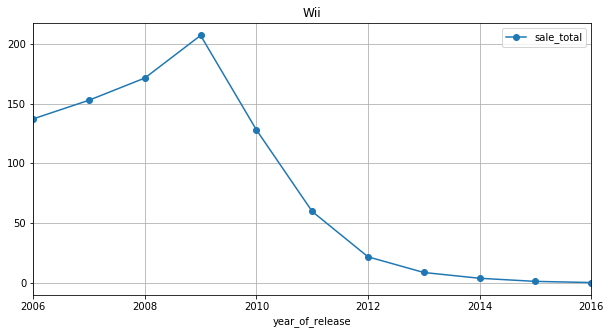

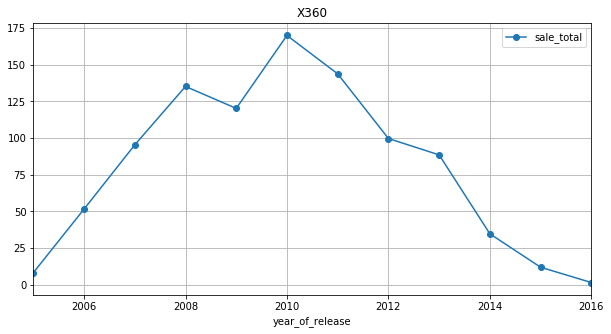

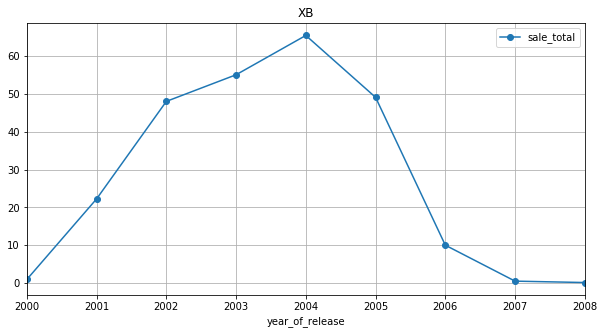

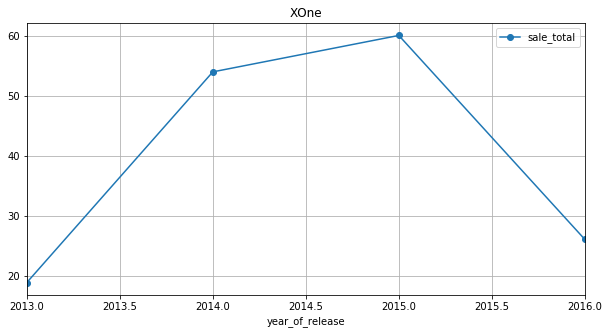

In [16]:
for name, group_data in games_top_platform_grouped.groupby('platform'):
    group_data.plot(x='year_of_release', kind='line', style='o-', title=name, grid=True, figsize=(10, 5))
    plt.show()

Полученные графики распределения продаж позволяют увидеть определенные закономерности в "жизненном цикле" платформ. Так, на основе анализа 18 крупшейших по продажам игр можно предположить, что обычный цикл платформы составляет 7 - 8 лет.

### 3.3 На основе полученных результатов, установим актуальный период

Полученные результаты характерного срока жизни платформ позволяет преположить, что актуальным периодом для анализа ближайшего года (2017) является отрезок до 6 лет, т.е. в данному случае период с 2011 года

### 3.4 Проанализируем этот период

Проанализируем период и определим, какие платформы лидируют по продажам, какие растут, а какие падают. На основе этого, выберим потенциально прибыльные платформы

In [17]:
games_upd = games.query('year_of_release > 2010').reset_index(drop=True)

In [18]:
games_upd.pivot_table(index='platform', values='sale_total', aggfunc='sum').sort_values('sale_total', ascending=False)

,sale_total
platform,
PS3,445.57
X360,380.38
PS4,314.14
3DS,257.81
XOne,159.32
PC,97.68
Wii,95.02
WiiU,82.19
PSV,53.81


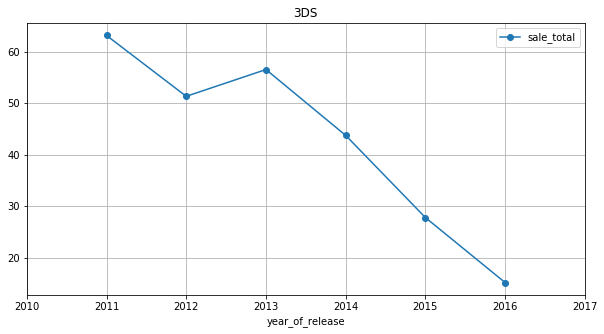

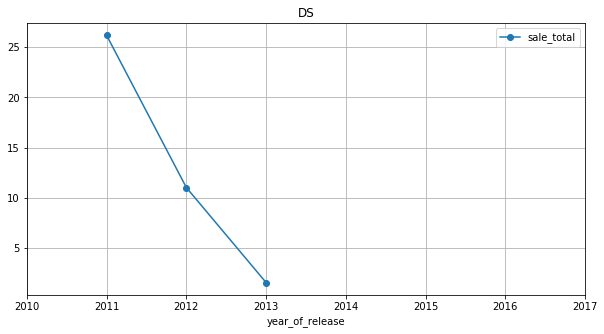

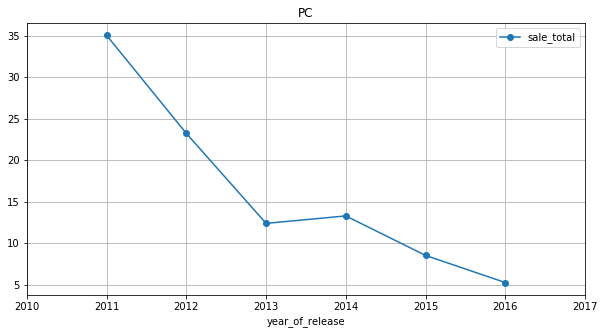

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 2011.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


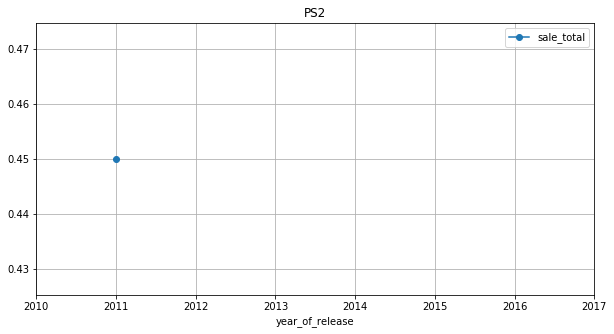

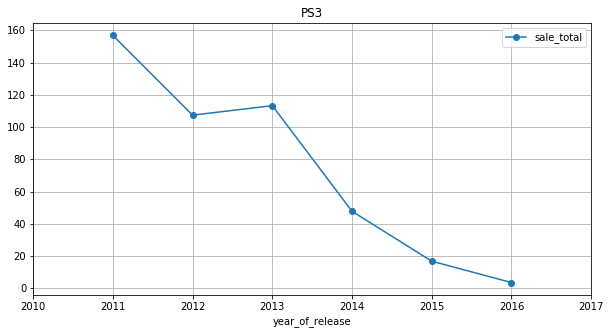

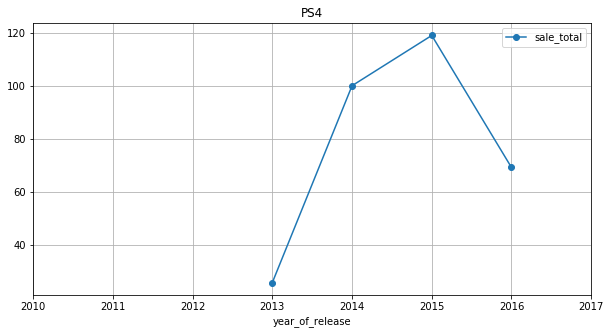

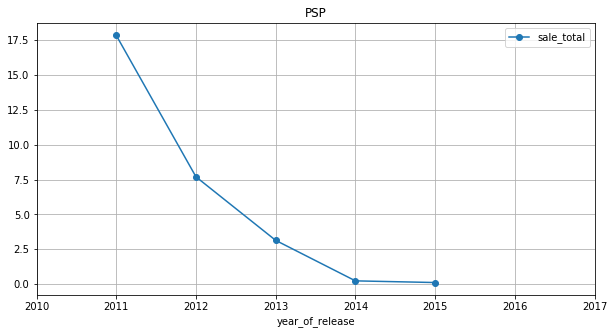

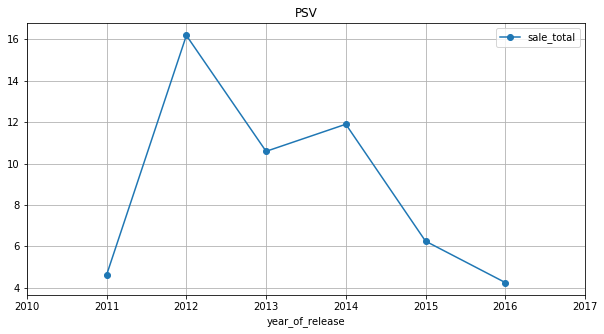

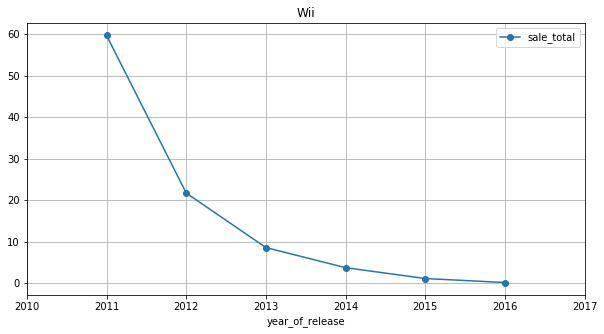

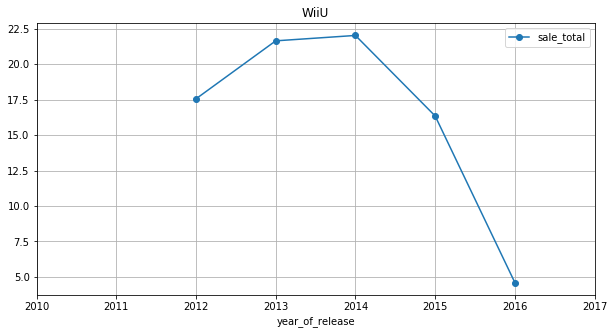

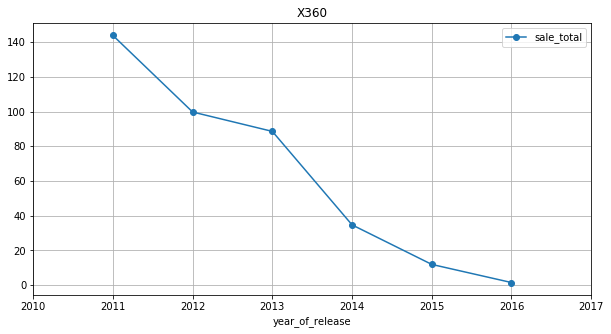

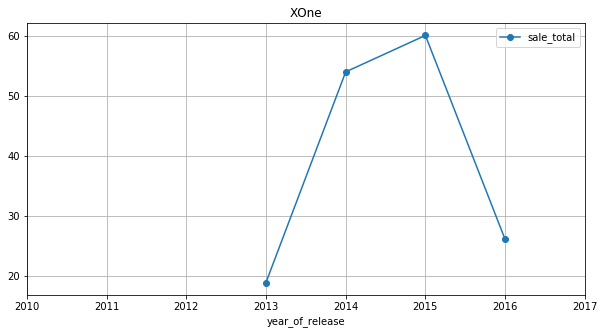

In [19]:
games_top_platform_grouped_upd = games_upd.pivot_table(
    index=['year_of_release', 'platform'], values='sale_total', aggfunc='sum').reset_index(inplace=False)

for name, group_data in games_top_platform_grouped_upd.groupby('platform'):
    group_data.plot(x='year_of_release', kind='line',
                    style='o-', title=name, grid=True, xlim=(2010, 2017), figsize=(10, 5))
    plt.show()

Полученные данные позволяют сделать следующие выводы:
1. Наиболее прибыльными платформами с 2011 года являются PS3 - 445.57 млн. долларов, X360 - 380.38 млн. долларов, PS4 - 314.14 млн. долларов, 3DS - 257.81 млн. долларов и XOne - 159.32 млн. долларов;
2. За рассматриваемый период рост по продажам можно отметить только у PS4 и XOne (при условии неполноты данных за 2016 год), остальные платформы имеют устойчивый тренд к снижению объемов продаж;

Таким образом, полученные данные позволяют заключить, что PS4 и XOne имеют наибольший потенциал в ближайшей перспективе

### 3.5 Рассмотрим выбросы продаж по платформам с помощью "ящика с усами"

[(0, 3)]

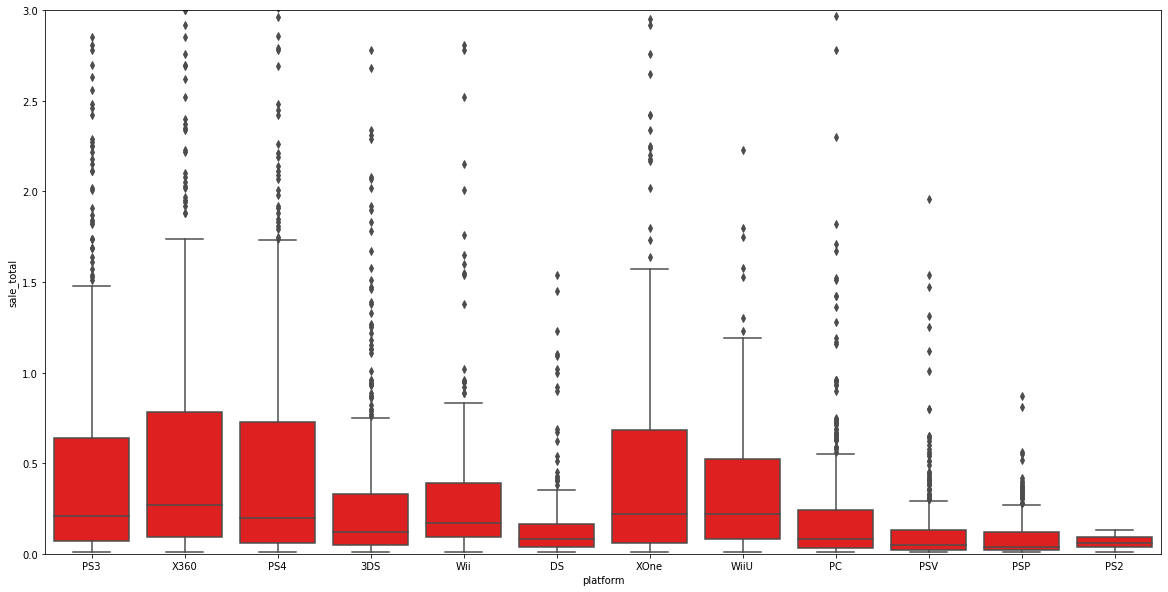

In [20]:
plt.figure(figsize=(20, 10))
boxplot = sns.boxplot(data = games_upd, x = 'platform', y = 'sale_total', color='red')
boxplot.set(ylim=(0, 3))

In [21]:
games_upd.groupby('platform')['sale_total'].describe().sort_values('count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
PS3,708.0,0.629336,1.451388,0.01,0.0700,0.21,0.6400,21.05
3DS,512.0,0.503535,1.441271,0.01,0.0500,0.12,0.3325,14.60
X360,498.0,0.763815,1.637090,0.01,0.0900,0.27,0.7800,16.27
PSV,429.0,0.125431,0.212341,0.01,0.0200,0.05,0.1300,1.96
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.20,0.7300,14.63
PC,389.0,0.251105,0.505710,0.01,0.0300,0.08,0.2400,5.14
PSP,312.0,0.092981,0.116731,0.01,0.0200,0.04,0.1200,0.87
XOne,247.0,0.645020,1.036139,0.01,0.0600,0.22,0.6850,7.39
Wii,197.0,0.482335,1.059069,0.01,0.0900,0.17,0.3900,10.12


"Ящик с усами" позволяет сделать следующие выводы:
1. У всех представленных платформ медиана располагается ближе к первому квартилю, что говорит о большом количестве игр, которые имеют относительно небольшие продажи. Это подтверждается статистическим описанием данных, в которых средняя на несколько порядков выше медианы;
2. PS3, X360, PS4, 3DS, Wii, XOne, WiiU располагают большими смещениями вправо. Это говорит о том, что на данных платформах чаще других выпускажтся игры, которые приносят большие деньги;
3. Наибольшим средним по продажам игр обладает PS4 и X360, что в целом делает вложения в такие продукты более прогнозируемым;
4. Максимальные продажи были у PS3 и X360. Эти цифры полезны для понимания покупательной способности пользователей этих платформ

### 3.6 Рассмтрим влияние на продажи отзывов критиков и пользователей, установим корреляцию

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f68006808d0>,
      dtype=object)

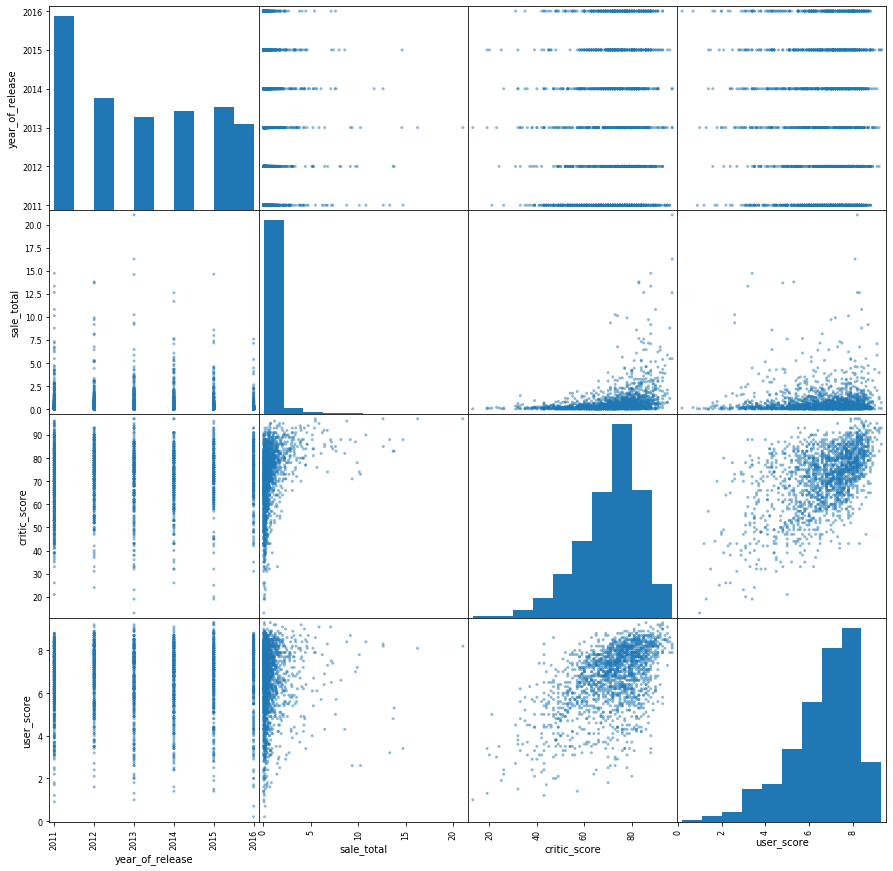

In [22]:
parameters = games_upd[['name', 'platform', 'year_of_release', 'sale_total', 'critic_score', 'user_score']]
pd.plotting.scatter_matrix(parameters, figsize=(15, 15))

Построенная диаграмма рассеяния показывает взаимосвязь между интересующими нас параметрами - sale_total, critic_score и user_score. Как можно заметить, в случае с critic_score продажи взаимосвязаны сильнее, чем с user_score. Вероятно, это объясняется тем, что люди покупают игры, основываясь больше на мнении экспертов, нежели чем мнении других пользователей. Между critic_score и user_score наблюдается логичная взаимосвязь - чем выше critic_score, тем выше user_score. Проверим выводы с помощью корреляции между этими параметрами

In [23]:
games_upd['sale_total'].corr(games_upd['critic_score'])

0.3299765050114585

Корреляция между sale_total и critic_score 0.329, что указывает не несильную зависимость. Тем не менее, чем выше отзывы критиков, тем больше продажи, что подтверждает отмеченную идею выше

In [24]:
games_upd['sale_total'].corr(games_upd['user_score'])

0.03163612772559288

Между sale_total и user_score нет такой корреляции, что говорит о практически полном отсутствии взаимосвязи. Вероятно, люди оценивают игры исходя из своих личных предпочтений, что никак не связано с экономическими и другими причинами

In [25]:
games_upd['critic_score'].corr(games_upd['user_score'])

0.5348532967085243

Отдельно рассмотрим взаимосвязь продаж и отзывов на популярных платформах - PS4 и XOne

In [26]:
games_upd_xone = games_upd.query('platform == "XOne"').dropna().reset_index(drop=True)
games_upd_ps4 = games_upd.query('platform == "PS4"').dropna().reset_index(drop=True)

In [27]:
games_upd_xone['sale_total'].corr(games_upd_xone['critic_score'])

0.409929586886011

In [28]:
games_upd_xone['sale_total'].corr(games_upd_xone['user_score'])

-0.07591595053938044

In [29]:
games_upd_ps4['sale_total'].corr(games_upd_ps4['critic_score'])

0.40357291073577817

In [30]:
games_upd_ps4['sale_total'].corr(games_upd_ps4['user_score'])

-0.03088781296873357

В обоих случаях, наблюдается взаимосвязь между отзывами критиков и продажами игр на выбранных платформах. Людям важно учитывать мнение критиков при покупке игры. В случае же с отзывами пользователей, взаимосвязь установить не удалось.

### 3.7 Рассмотрим распределение игр по жанрам и попробуем выявить взаимосвязь с продажами

In [31]:
sales_by_genre = games_upd.pivot_table(index='genre', values='sale_total', 
                                       aggfunc='sum').sort_values('sale_total', ascending=False)
sales_by_genre

,sale_total
genre,
Action,557.80
Shooter,402.91
Role-Playing,245.63
Sports,237.15
Misc,139.42
Platform,88.68
Racing,88.31
Fighting,66.90
Simulation,50.26


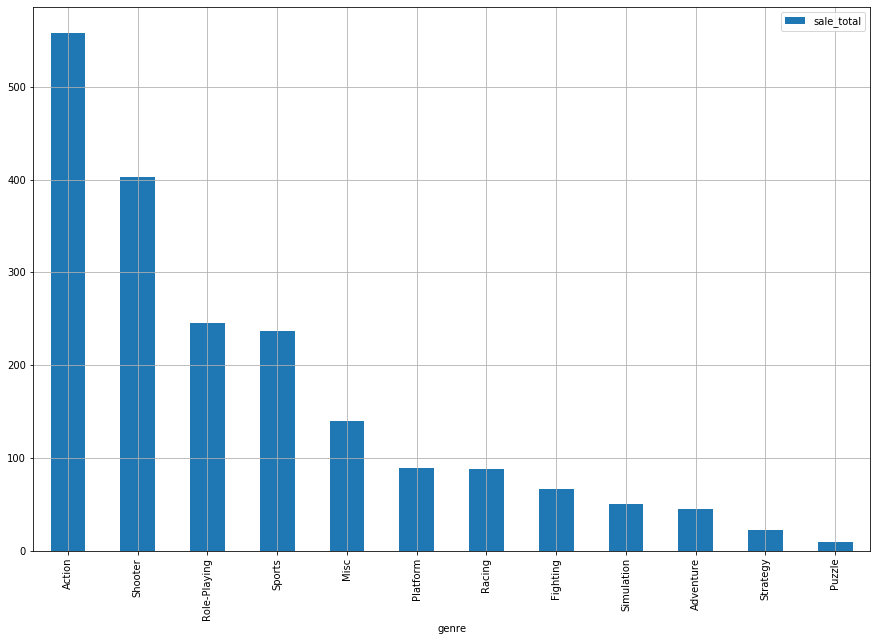

In [32]:
sales_by_genre.plot(kind='bar', grid=True, figsize=(15, 10))

Распределение продаж по жанрам указывает на большую популярность Action и Shooter игр. Следом идут игры в жанре RPG и Sport. Данная инофрмация должна обязательно учитываться при прогнозировании эффективности проектов

Ислледовательский анализ данных позволил получить следующие выводы:
1. В среднем в год выпускается 444 игры, наибольшее количество было выпущено в 2008 и 2009 годах - по 1400 игр;
2. Примерный "жизненный цикл" продаж по платформам 7-8 лет. Эти данные позволили установить актуальный период для прогноза - с 2011 года;
3. Наиболее продающими платформами с 2011 года являются PS3 - 445.57 млн. долларов, X360 - 380.38 млн. долларов, PS4 - 314.14 млн. долларов, 3DS - 257.81 млн. долларов и XOne - 159.32 млн. долларов;
4. За рассматриваемый период рост по продажам можно отметить только у PS4 и XOne (при условии неполноты данных за 2016 год), остальные платформы имеют устойчивый тренд к снижению объемов продаж;
5. У всех платформ в актуальном периоде медиана располагается ближе к первому квартилю, что говорит о большом количестве игр, которые имеют относительно небольшие продажи. Это подтверждается статистическим описанием данных, в которых средняя на несколько порядков выше медианы;
6. PS3, X360, PS4, 3DS, Wii, XOne, WiiU располагают большими смещениями вправо. Это говорит о том, что на данных платформах чаще других выпускажтся игры, которые приносят большие деньги;
7. Наибольшим средним по продажам игр обладает PS4 и X360, что в целом делает вложения в такие продукты более прогнозируемым;
8. Максимальные продажи были у PS3 и X360. Эти цифры полезны для понимания покупательной способности пользователей этих платформ;
9. Корреляция между sale_total и critic_score 0.329, что указывает не несильную зависимость;
10. Между sale_total и user_score нет такой корреляции, что говорит о практически полном отсутствии взаимосвязи;
11. Распределение продаж по жанрам указывает на большую популярность Action и Shooter игр. Следом идут игры в жанре RPG и Sport.

## 4. Портрет пользователя

### 4.1 Самые популярные платформы в регионах

In [33]:
region_top_platforms = games_upd.pivot_table(index='platform', 
                                             values=('na_sales', 'eu_sales', 'jp_sales'), aggfunc='sum')

In [34]:
region_top_platforms.sort_values('eu_sales', ascending=False).head()

,eu_sales,jp_sales,na_sales
platform,,,
PS3,163.10,49.39,168.26
PS4,141.09,15.96,108.74
X360,117.10,3.35,226.80
3DS,61.27,100.62,82.65
PC,56.70,0.00,29.88


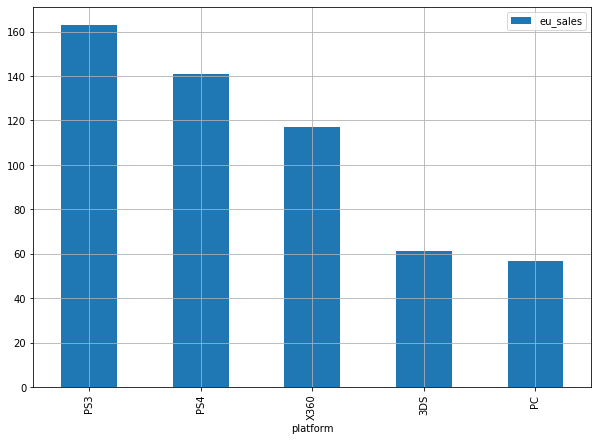

In [35]:
region_top_platforms.sort_values('eu_sales', ascending=False).head().plot(
    y='eu_sales', kind='bar', grid=True, figsize=(10, 7))

In [36]:
region_top_platforms.sort_values('jp_sales', ascending=False).head()

,eu_sales,jp_sales,na_sales
platform,,,
3DS,61.27,100.62,82.65
PS3,163.10,49.39,168.26
PSP,1.77,24.04,2.19
PSV,13.07,21.84,12.47
PS4,141.09,15.96,108.74


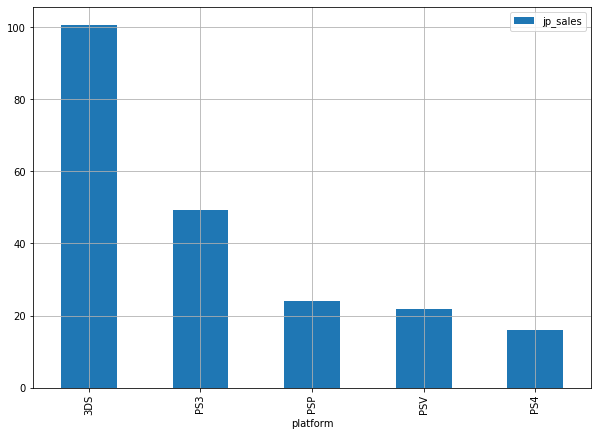

In [37]:
region_top_platforms.sort_values('jp_sales', ascending=False).head().plot(
    y='jp_sales', kind='bar', grid=True, figsize=(10, 7))

In [38]:
region_top_platforms.sort_values('na_sales', ascending=False).head()

,eu_sales,jp_sales,na_sales
platform,,,
X360,117.10,3.35,226.80
PS3,163.10,49.39,168.26
PS4,141.09,15.96,108.74
XOne,51.59,0.34,93.12
3DS,61.27,100.62,82.65


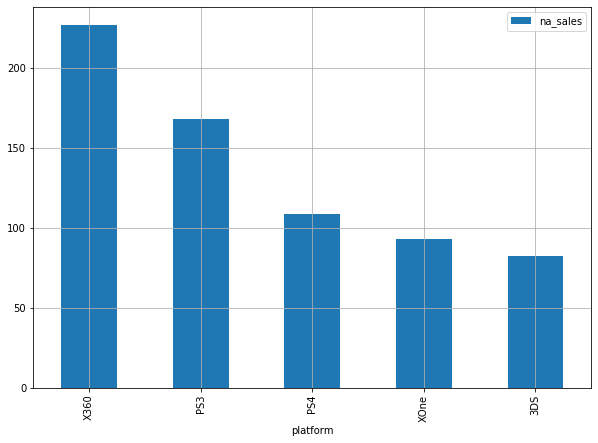

In [39]:
region_top_platforms.sort_values('na_sales', ascending=False).head().plot(
    y='na_sales', kind='bar', grid=True, figsize=(10, 7))

Топ платформ по регионам в актуальном периоде выглядит следующим образом:
1. EU
Наиболее популярной платформой является PS3, следом располагается PS4 и X360;
2. JP
Наиболее популярной платформой является 3DS. Данный регион наименьшего объема по выручке с продаж игр;
3. NA
Наиболее популярной платформой является X360, следом располагается PS3 и PS4. Данный регион наибольшего объема по выручке с продаж игр.

### 4.2 Самые популярные жанры по регионам

In [40]:
region_top_genres = games_upd.pivot_table(index='genre', 
                                             values=('na_sales', 'eu_sales', 'jp_sales'), aggfunc='sum')

In [41]:
region_top_genres.sort_values('eu_sales', ascending=False).head()

,eu_sales,jp_sales,na_sales
genre,,,
Action,199.12,63.62,230.92
Shooter,148.02,11.92,194.43
Sports,88.48,11.09,108.70
Role-Playing,62.30,79.87,83.78
Racing,40.58,5.64,31.98


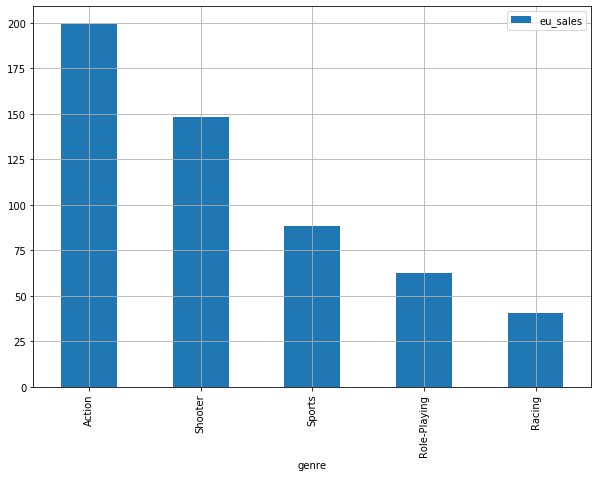

In [42]:
region_top_genres.sort_values('eu_sales', ascending=False).head().plot(
    y='eu_sales', kind='bar', grid=True, figsize=(10, 7))

In [43]:
region_top_genres.sort_values('jp_sales', ascending=False).head()

,eu_sales,jp_sales,na_sales
genre,,,
Role-Playing,62.30,79.87,83.78
Action,199.12,63.62,230.92
Misc,39.72,17.60,69.69
Fighting,16.24,12.38,31.63
Platform,30.07,12.13,38.28


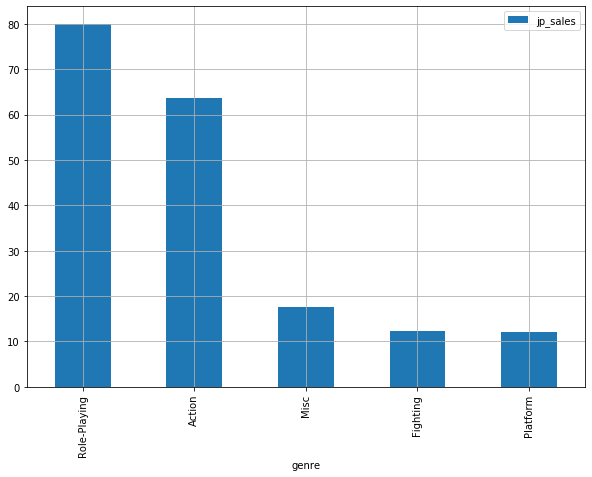

In [44]:
region_top_genres.sort_values('jp_sales', ascending=False).head().plot(
    y='jp_sales', kind='bar', grid=True, figsize=(10, 7))

In [45]:
region_top_genres.sort_values('na_sales', ascending=False).head()

,eu_sales,jp_sales,na_sales
genre,,,
Action,199.12,63.62,230.92
Shooter,148.02,11.92,194.43
Sports,88.48,11.09,108.70
Role-Playing,62.30,79.87,83.78
Misc,39.72,17.60,69.69


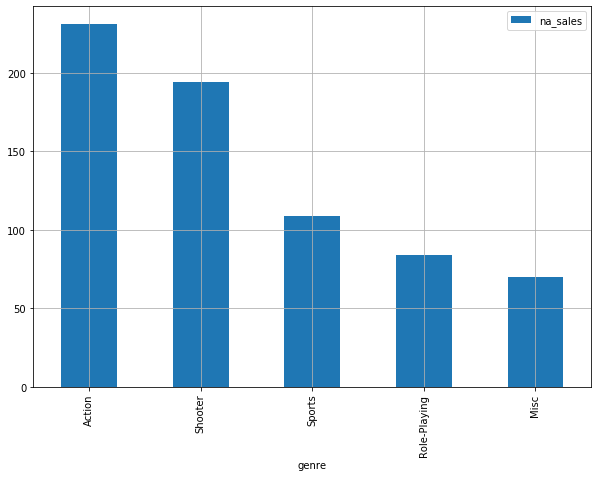

In [46]:
region_top_genres.sort_values('na_sales', ascending=False).head().plot(
    y='na_sales', kind='bar', grid=True, figsize=(10, 7))

Топ жанров по регионам в актуальном периоде выглядит следующим образом:
1. EU
Наиболее популярными жанрами игр в Европе является Action и Shooter;
2. JP
Наиболее популярными жанрами игр в Японии является RPG и Action;
3. NA
Наиболее популярными жанрами игр в Америке является Action и Shooter.

Распределение по выручке по жанрам соответствует распределению по платформам

### 4.3 Влияет ли рейтинг ESRB на продажи в отдельном регионе

In [47]:
region_top_rating = games_upd.pivot_table(index='rating', 
                                             values=('na_sales', 'eu_sales', 'jp_sales'), aggfunc='sum')

In [48]:
region_top_rating.sort_values('eu_sales', ascending=False)

,eu_sales,jp_sales,na_sales
rating,,,
M,250.26,26.14,308.45
E,141.73,36.68,170.17
T,83.16,33.39,109.31
E10+,78.00,11.23,117.72
RP,0.03,0.00,0.00
EC,0.00,0.00,0.42


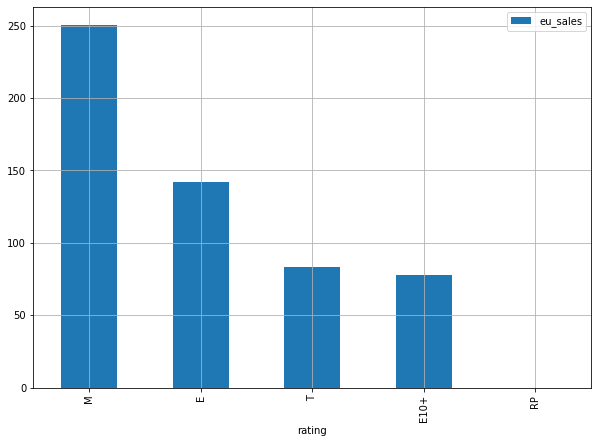

In [49]:
region_top_rating.sort_values('eu_sales', ascending=False).head().plot(
    y='eu_sales', kind='bar', grid=True, figsize=(10, 7))

In [50]:
region_top_rating.sort_values('jp_sales', ascending=False)

,eu_sales,jp_sales,na_sales
rating,,,
E,141.73,36.68,170.17
T,83.16,33.39,109.31
M,250.26,26.14,308.45
E10+,78.00,11.23,117.72
EC,0.00,0.00,0.42
RP,0.03,0.00,0.00


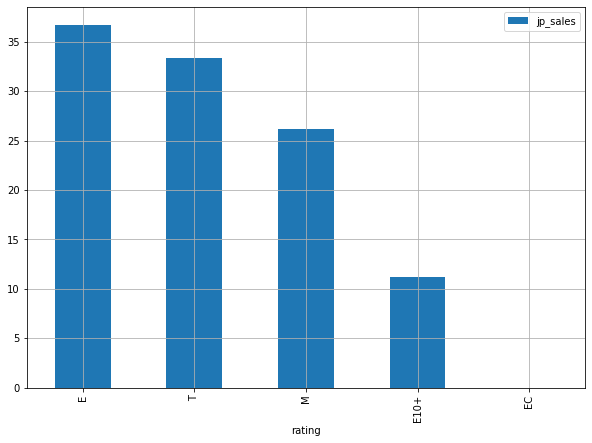

In [51]:
region_top_rating.sort_values('jp_sales', ascending=False).head().plot(
    y='jp_sales', kind='bar', grid=True, figsize=(10, 7))

In [52]:
region_top_rating.sort_values('na_sales', ascending=False)

,eu_sales,jp_sales,na_sales
rating,,,
M,250.26,26.14,308.45
E,141.73,36.68,170.17
E10+,78.00,11.23,117.72
T,83.16,33.39,109.31
EC,0.00,0.00,0.42
RP,0.03,0.00,0.00


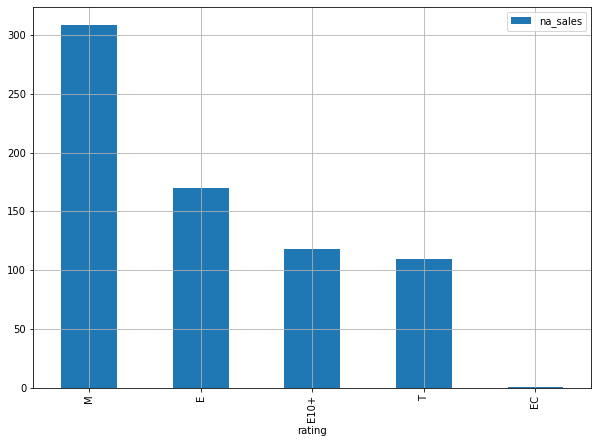

In [53]:
region_top_rating.sort_values('na_sales', ascending=False).head().plot(
    y='na_sales', kind='bar', grid=True, figsize=(10, 7))

В зависимости от рейтинга ESRB можно сделать следующие выводы:
1. EU
В Европе наиболее популярные игры получают статус Mature (от 17 лет). Вероятно, это связано с большой популярностью игр в жанре Action и Shooter;
2. JP
В Японии популярным играм рейтинговое агентство присвает статус E (для всех) и T (для подростков);
3. NA
В Америке топ принадлежит играм со статусом Mature, что соответсвует ситуации в Европе.

## 5. Проверка гипотез

### 5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза: средний пользовательский рейтинг игр с платформы XOne равен среднему пользовательскому рейтингу игр с платформы PC
Альтернативная гипотеза: средний пользовательский рейтинг игр с платформы XOne не равен среднему пользовательскому рейтингу игр с платформы PC

Уровень альфа 5%

In [54]:
games_upd_pc = games_upd.query('platform == "PC"').dropna().reset_index(drop=True)

In [55]:
sample_user_xone = games_upd_xone['user_score']
sample_user_pc = games_upd_pc['user_score']
alpha = .05

results = st.ttest_ind(sample_user_pc, sample_user_xone)

print('Р-значение', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Р-значение 0.6814037291924004
Не получилось отвергнуть нулевую гипотезу


На основе полученных результатов выборки, следует предположить, что средний пользовательский рейтинг игр с платформы XOne равен среднему пользовательскому рейтингу игру с платформы PC с уровнем значимости в 5%

---
## Комментарий от наставника

Гипотезы сформулированы и проверены верно.

---

### 5.2 Средние пользовательские рейтинги жанров Action и Sports разные

Нулевая гипотеза: средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports
Альтернативная гипотеза: средний пользовательский рейтинг жанра Action не равен среднему пользовательскому рейтингу жанра Sports

Уровень альфа 5%

In [56]:
games_upd_action = games_upd.query('genre == "Action"').dropna().reset_index(drop=True)
games_upd_sports = games_upd.query('genre == "Sports"').dropna().reset_index(drop=True)

In [57]:
sample_user_action = games_upd_action['user_score']
sample_user_sports = games_upd_sports['user_score']
alpha = .05

results = st.ttest_ind(sample_user_action, sample_user_sports)

print('Р-значение', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Р-значение 1.858490589373727e-13
Отвергаем нулевую гипотезу


На основе полученных результатов выборки, следует предположить, что средний пользовательский рейтинг игр жанра Action не равен среднему пользовательскому рейтингу игру жанра Sports с уровнем значимости в 5%

## 6. Общий вывод

1. Названия столбцов были приведены к нижнему регистру;
2. Данные в столбце year_of_release очищены и заменены на тип int64;
3. Значения в столбце user_score переведены в формат float64 (значения tbd переведены в NaN);
4. Обоснована логика по работе со значениями NaN;
5. Посчитаны суммарные продажи по регионам na, eu, jp и other;
6. В среднем в год выпускается 444 игры, наибольшее количество было выпущено в 2008 и 2009 годах - по 1400 игр;
7. Примерный "жизненный цикл" продаж по платформам 7-8 лет. Эти данные позволили установить актуальный период для прогноза - с 2011 года;
8. Наиболее продающими платформами с 2011 года являются PS3 - 445.57 млн. долларов, X360 - 380.38 млн. долларов, PS4 - 314.14 млн. долларов, 3DS - 257.81 млн. долларов и XOne - 159.32 млн. долларов;
9. За рассматриваемый период рост по продажам можно отметить только у PS4 и XOne (при условии неполноты данных за 2016 год), остальные платформы имеют устойчивый тренд к снижению объемов продаж;
10. У всех платформ в актуальном периоде медиана располагается ближе к первому квартилю, что говорит о большом количестве игр, которые имеют относительно небольшие продажи. Это подтверждается статистическим описанием данных, в которых средняя на несколько порядков выше медианы;
11. PS3, X360, PS4, 3DS, Wii, XOne, WiiU располагают большими смещениями вправо. Это говорит о том, что на данных платформах чаще других выпускажтся игры, которые приносят большие деньги;
12. Наибольшим средним по продажам игр обладает PS4 и X360, что в целом делает вложения в такие продукты более прогнозируемым;
13. Максимальные продажи были у PS3 и X360. Эти цифры полезны для понимания покупательной способности пользователей этих платформ;
14. Корреляция между sale_total и critic_score 0.329, что указывает не несильную зависимость;
15. Между sale_total и user_score нет такой корреляции, что говорит о практически полном отсутствии взаимосвязи;
16. Распределение продаж по жанрам указывает на большую популярность Action и Shooter игр. Следом идут игры в жанре RPG и Sport;
17. EU Наиболее популярной платформой является PS3, следом располагается PS4 и X360;
18. JP Наиболее популярной платформой является 3DS. Данный регион наименьшего объема по выручке с продаж игр;
19. NA Наиболее популярной платформой является X360, следом располагается PS3 и PS4. Данный регион наибольшего объема по выручке с продаж игр;
20. EU Наиболее популярными жанрами игр в Европе является Action и Shooter;
21. JP Наиболее популярными жанрами игр в Японии является RPG и Action;
22. NA Наиболее популярными жанрами игр в Америке является Action и Shooter;
23. EU В Европе наиболее популярные игры получают статус Mature (от 17 лет). Вероятно, это связано с большой популярностью игр в жанре Action и Shooter;
24. JP В Японии популярным играм рейтинговое агентство присвает статус E (для всех) и T (для подростков);
25. NA В Америке топ принадлежит играм со статусом Mature, что соответсвует ситуации в Европе;
26. На основе полученных результатов выборки, следует предположить, что средний пользовательский рейтинг игр с платформы XOne равен среднему пользовательскому рейтингу игру с платформы PC с уровнем значимости в 5%;
27. На основе полученных результатов выборки, следует предположить, что средний пользовательский рейтинг игр жанра Action не равен среднему пользовательскому рейтингу игру жанра Sports с уровнем значимости в 5%.